<>:67: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<>:67: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
/tmp/ipykernel_18233/1585122061.py:67: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
  - 4.0 * msleptons**2.0 / wvalue**2.0 (1.0 - 2.0*m**2.0 / wvalue**2.0) * np.log( (1.0 + beta)/(1.0 - beta) )  )


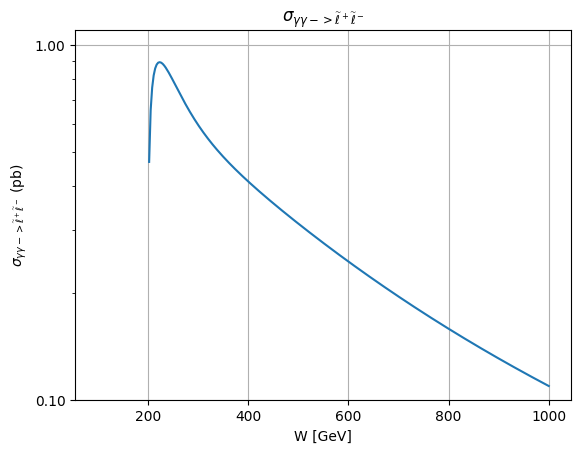

In [3]:
import numpy as np

import matplotlib.pyplot as plt

import math

from matplotlib.ticker import ScalarFormatter


# Generate x values from 0 to 2*pi
wvalue = np.linspace(100, 1000, 300)



##################################################################


def cs_sleptons_w_condition(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0  
    me = 0.510998950e-3
    msleptons = 100.0
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * msleptons * msleptons / wvalue**2.0 >= 0, 1.0 - 4.0 * msleptons * msleptons / wvalue**2.0, np.nan))

    # Element-wise calculation of cs using np.where
    cs = np.where(wvalue > msleptons, (2.0 * np.pi * alpha2 * hbarc2 ) / wvalue**2.0 * (beta) * \
             (2.0 - beta**2.0 - (1.0 - beta**4.0)/(2.0 * beta) * np.log( (1.0 + beta)/(1.0 - beta) )), 0.0) * 1e9

    return cs


##################################################################

def cs_sleptons_w(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    msleptons = 100.0
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    # Element-wise comparison
    beta = np.sqrt( 1.0 - 4.0 * msleptons * msleptons / wvalue**2.0 )

    # Element-wise calculation of cs
    cs = (2.0 * np.pi * alpha2 * hbarc2 ) / wvalue**2.0 * (beta) * \
             ( 2.0 - beta**2.0 - (1.0 - beta**4.0)/(2.0 * beta)*np.log( (1.0 + beta)/(1.0 - beta) ) ) * 1e9

    return cs

##################################################################

def cs_sleptons_w_PLB_328(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    msleptons = 100.0
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    # Element-wise comparison
    beta = np.sqrt( 1.0 - 4.0 * msleptons * msleptons / wvalue**2.0 )

    # Element-wise calculation of cs
    cs = (2.0 * np.pi * alpha2 * hbarc2 ) * ( beta * (1.0 + 4.0*msleptons**2.0/wvalue**2.0) -  
      - 4.0 * msleptons**2.0 / wvalue**2.0 * (1.0 - 2.0*m**2.0 / wvalue**2.0) * np.log( (1.0 + beta)/(1.0 - beta) )  )


    return cs

##################################################################



# Calculate y values using cs_DM_w function
y = cs_sleptons_w_condition(wvalue)
#y = cs_DM_w(wvalue)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data
ax.plot(wvalue, y)

ax.set_yscale("log")

# Set y-axis limits to restrict the range
ax.set_ylim(0.10, 1.10)

# Customize the plot
ax.set_xlabel('W [GeV]')
ax.set_ylabel('$\sigma_{\gamma \gamma -> \widetilde{\ell}^+ \widetilde{\ell}^-}$ (pb)')
ax.set_title('$\sigma_{\gamma \gamma ->  \widetilde{\ell}^+ \widetilde{\ell}^-}$')

plt.grid(True)


# Set y-axis ticks in the form of 0.3, 0.4, etc.
ax.yaxis.set_major_formatter(ScalarFormatter())


# Save the plot as a PDF file
plt.savefig('cs_sleptons_w_plot.pdf')
plt.savefig('cs_sleptons_w_plot.jpg')

# Show the plot
plt.show()



In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0 to 2*pi
wvalue = np.linspace(10, 1000, 300)
mDM = np.linspace(10, 100, 10)

def cs_DM_w(wvalue, mDM):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mDM * mDM[:, None] / wvalue**2 >= 0, 1.0 - 4.0 * mDM * mDM[:, None] / wvalue**2, np.nan))

    # Element-wise calculation of cs using np.where
    cs = np.where(wvalue > mDM[:, None], (4.0 * np.pi * alpha2 * hbarc2 ) / wvalue * (beta) * \
             (2.0 - beta**2.0 - (1-beta**4.0)/(2.0 * beta) * np.log((1.0+beta)/(1.0-beta))), 0.) * 1e9

    return cs

# Calculate y values using cs_DM_w function
y = cs_DM_w(wvalue, mDM)

# Set values for alpha2
alpha2 = (1.0/137.0)*(1.0/137.0)

# Calculate the modified expression
modified_expr = y * np.pi * alpha2 / (4.0 * mDM**4)

# Calculate x values for the modified expression
x_modified_expr = 2.0 * mDM / np.sqrt(wvalue[:, None])

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the modified expression
ax.plot(x_modified_expr, modified_expr)

ax.set_yscale("log")

# Customize the plot
ax.set_xlabel('2 * mDM / sqrt(W) [GeV]')
ax.set_ylabel('Modified Expression')
ax.set_title('Modified Expression vs. 2 * mDM / sqrt(W)')

# Save the plot as a PDF file
plt.savefig('modified_expression_plot.pdf')
plt.savefig('modified_expression_plot.jpg')

# Show the plot
plt.show()



ValueError: operands could not be broadcast together with shapes (10,10) (300,) 

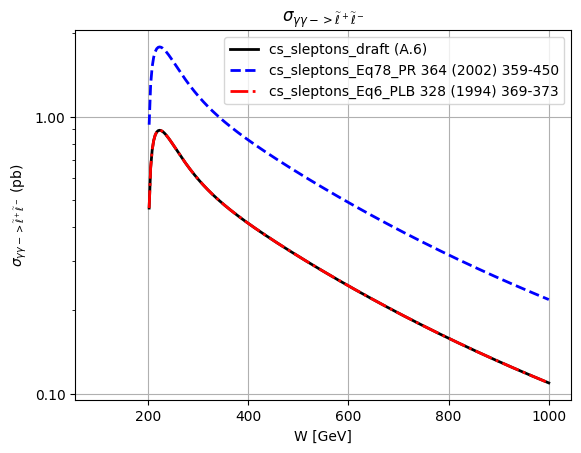

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Generate x values from 0 to 2*pi
wvalue = np.linspace(100, 1000, 300)



def cs_sleptons_w_Draft(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0  
    me = 0.510998950e-3
    msleptons = 100.0
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * msleptons * msleptons / wvalue**2.0 >= 0, 1.0 - 4.0 * msleptons * msleptons / wvalue**2.0, np.nan))

    # Element-wise calculation of cs using np.where
    cs = np.where(wvalue > msleptons, (2.0 * np.pi * alpha2 * hbarc2 ) / wvalue**2.0 * (beta) * \
             (2.0 - beta**2.0 - (1.0 - beta**4.0)/(2.0 * beta) * np.log( (1.0 + beta)/(1.0 - beta) )), 0.0) * 1e9

    return cs



def cs_sleptons_w_PR_364(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0  
    me = 0.510998950e-3
    msleptons = 100.0
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * msleptons * msleptons / wvalue**2.0 >= 0, 1.0 - 4.0 * msleptons * msleptons / wvalue**2.0, np.nan))

    # Element-wise calculation of cs using np.where
    cs = np.where(wvalue > msleptons, (4.0 * np.pi * alpha2 * hbarc2 ) / wvalue**2.0 * (beta) * \
             (2.0 - beta**2.0 - (1.0 - beta**4.0)/(2.0 * beta) * np.log( (1.0 + beta)/(1.0 - beta) )), 0.0) * 1e9

    return cs



def cs_sleptons_w_PLB_328(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    msleptons = 100.0
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0) 

    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * msleptons * msleptons / wvalue**2.0 >= 0, 1.0 - 4.0 * msleptons * msleptons / wvalue**2.0, np.nan))

    # Element-wise calculation of cs using np.where
    cs = np.where(wvalue > msleptons, (2.0 * np.pi * alpha2 * hbarc2 ) / wvalue**2.0 * ( beta * (1.0 + 4.0*msleptons**2.0/wvalue**2.0)   
          - 4.0 * msleptons**2.0 / wvalue**2.0 * (1.0 - 2.0*msleptons**2.0 / wvalue**2.0) * np.log( (1.0 + beta)/(1.0 - beta) ) ), 0.0) * 1e9

    return cs


# Calculate y values using cs_sleptons_w_condition function
y_Draft = cs_sleptons_w_Draft(wvalue)

# Calculate y values using cs_sleptons_w_condition function
y_PR_364 = cs_sleptons_w_PR_364(wvalue)

# Calculate y values using cs_sleptons_w_PLB_328 function
y_PLB_328 = cs_sleptons_w_PLB_328(wvalue)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data with additional options
ax.plot(wvalue, y_Draft, label='cs_sleptons_draft (A.6)', color='black', linestyle='solid', linewidth=2)
ax.plot(wvalue, y_PR_364, label='cs_sleptons_Eq78_PR 364 (2002) 359-450', color='blue', linestyle='dashed', linewidth=2)
ax.plot(wvalue, y_PLB_328, label='cs_sleptons_Eq6_PLB 328 (1994) 369-373', color='red', linestyle='dashdot', linewidth=2)

ax.set_yscale("log")

# Customize the plot
ax.set_xlabel('W [GeV]')
ax.set_ylabel('$\sigma_{\gamma \gamma -> \widetilde{\ell}^+ \widetilde{\ell}^-}$ (pb)')
ax.set_title('$\sigma_{\gamma \gamma ->  \widetilde{\ell}^+ \widetilde{\ell}^-}$')

plt.grid(True)
plt.legend()

# Set y-axis ticks in the form of 0.3, 0.4, etc.
ax.yaxis.set_major_formatter(ScalarFormatter())  

# Save the plot as a PDF file
plt.savefig('cs_sleptons_comparison_plot.pdf')
plt.savefig('cs_sleptons_comparison_plot.jpg') 

# Show the plot
plt.show()


